<a href="https://colab.research.google.com/github/HanenEl/Elevvo-Internship/blob/main/Task4%3A%20SQL-Based%20Analysis%20of%20Product%20Sales/SQL_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Read Data
conn = sqlite3.connect("/content/chinook.db")
c = conn.cursor()


In [2]:
# Show Tables
tables = pd.read_sql_query(
    '''SELECT name
       FROM sqlite_master
       WHERE type='table';''',
    conn
)

In [3]:
tables


,name
0,Album
1,Artist
2,Customer
3,Employee
4,Genre
5,Invoice
6,InvoiceLine
7,MediaType
8,Playlist
9,PlaylistTrack


In [4]:
# Show info about Track Table
pd.read_sql_query("PRAGMA table_info(Track);", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,TrackId,INTEGER,1,None,1
1,1,Name,NVARCHAR(200),1,None,0
2,2,AlbumId,INTEGER,0,None,0
3,3,MediaTypeId,INTEGER,1,None,0
4,4,GenreId,INTEGER,0,None,0
5,5,Composer,NVARCHAR(220),0,None,0
6,6,Milliseconds,INTEGER,1,None,0
7,7,Bytes,INTEGER,0,None,0
8,8,UnitPrice,"NUMERIC(10,2)",1,None,0


In [5]:
# Show info about InvoiceLine Table
pd.read_sql_query("PRAGMA table_info(InvoiceLine);", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,InvoiceLineId,INTEGER,1,None,1
1,1,InvoiceId,INTEGER,1,None,0
2,2,TrackId,INTEGER,1,None,0
3,3,UnitPrice,"NUMERIC(10,2)",1,None,0
4,4,Quantity,INTEGER,1,None,0


##1: What are the top-selling products?

In [6]:
query1 = """
SELECT t.Name AS TrackName,
       COUNT(il.Quantity) AS Quantity
FROM InvoiceLine il
JOIN Track t ON il.TrackId = t.TrackId
GROUP BY t.TrackId
ORDER BY Quantity DESC
LIMIT 5;
"""
df1 = pd.read_sql_query(query1, conn)

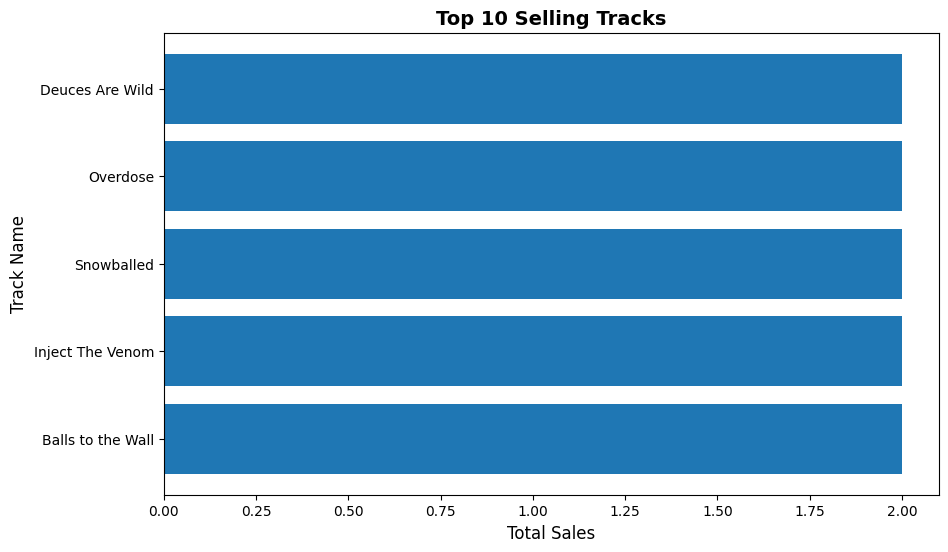

In [7]:

plt.figure(figsize=(10,6))

plt.barh(df1['TrackName'], df1['Quantity'])

plt.xlabel("Total Sales", fontsize=12)
plt.ylabel("Track Name", fontsize=12)
plt.title("Top 10 Selling Tracks", fontsize=14, fontweight="bold")
plt.show()

##2: What is the revenue by country?

In [8]:
pd.read_sql_query("PRAGMA table_info(Invoice);", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,InvoiceId,INTEGER,1,None,1
1,1,CustomerId,INTEGER,1,None,0
2,2,InvoiceDate,DATETIME,1,None,0
3,3,BillingAddress,NVARCHAR(70),0,None,0
4,4,BillingCity,NVARCHAR(40),0,None,0
5,5,BillingState,NVARCHAR(40),0,None,0
6,6,BillingCountry,NVARCHAR(40),0,None,0
7,7,BillingPostalCode,NVARCHAR(10),0,None,0
8,8,Total,"NUMERIC(10,2)",1,None,0


In [9]:
query2 = """
SELECT BillingCountry,
       SUM(Total) AS Revenue
FROM Invoice
GROUP BY BillingCountry
ORDER BY Revenue DESC
LIMIT 7;
"""
df2 = pd.read_sql_query(query2, conn)

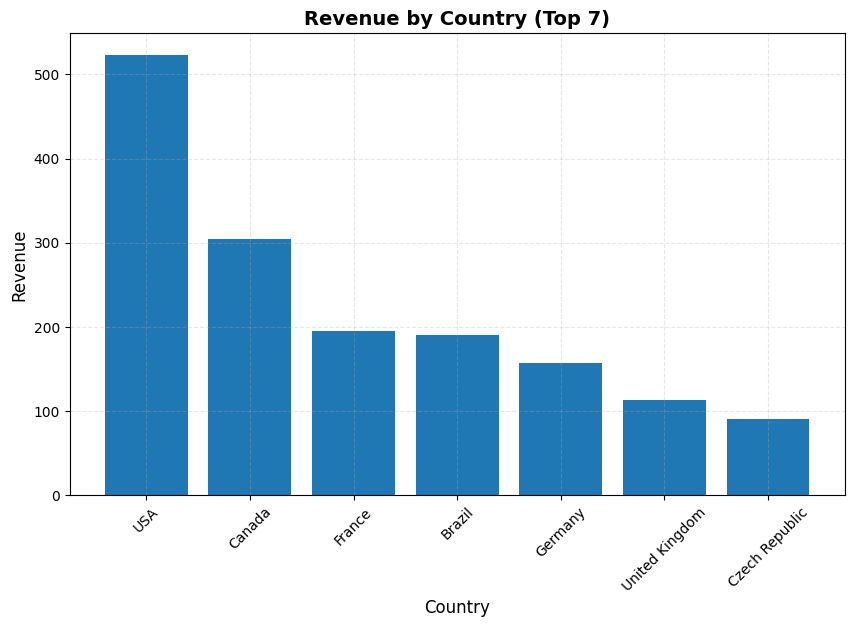

In [10]:
plt.figure(figsize=(10,6))

plt.bar(df2['BillingCountry'], df2['Revenue'])
plt.xlabel("Country", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.title("Revenue by Country (Top 7)", fontsize=14, fontweight="bold")

plt.grid(True, linestyle="--", alpha=0.3)
plt.xticks(rotation=45)
plt.show()

##3: Who are the top 3 customers by total spending?

In [11]:
pd.read_sql_query("PRAGMA table_info(Customer);", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,CustomerId,INTEGER,1,None,1
1,1,FirstName,NVARCHAR(40),1,None,0
2,2,LastName,NVARCHAR(20),1,None,0
3,3,Company,NVARCHAR(80),0,None,0
4,4,Address,NVARCHAR(70),0,None,0
5,5,City,NVARCHAR(40),0,None,0
6,6,State,NVARCHAR(40),0,None,0
7,7,Country,NVARCHAR(40),0,None,0
8,8,PostalCode,NVARCHAR(10),0,None,0
9,9,Phone,NVARCHAR(24),0,None,0


In [12]:
query = """
SELECT
    c.CustomerId,
    c.FirstName || ' ' || c.LastName AS CustomerName,
    SUM(i.Total) AS TotalSpending,
    RANK() OVER (ORDER BY SUM(i.Total) DESC) AS Rank
FROM Customer c
JOIN Invoice i ON c.CustomerId = i.CustomerId
GROUP BY c.CustomerId
ORDER BY TotalSpending DESC
LIMIT 3;
"""
df_top3_customers = pd.read_sql_query(query, conn)

In [13]:
df_top3_customers

,CustomerId,CustomerName,TotalSpending,Rank
0,6,Helena Holý,49.62,1
1,26,Richard Cunningham,47.62,2
2,57,Luis Rojas,46.62,3


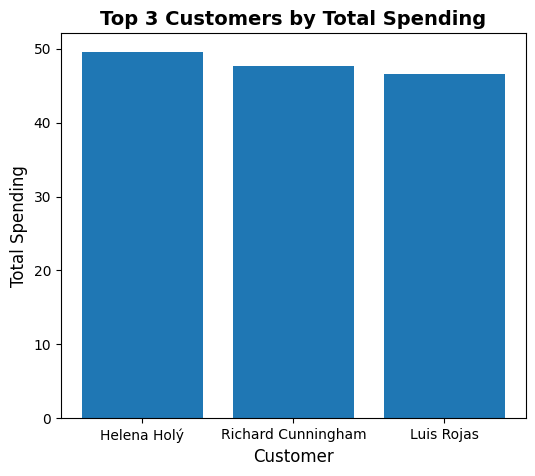

In [14]:
plt.figure(figsize=(6,5))

plt.bar(df_top3_customers["CustomerName"], df_top3_customers["TotalSpending"])
plt.title("Top 3 Customers by Total Spending",fontsize=14, fontweight="bold")
plt.xlabel("Customer",fontsize=12)
plt.ylabel("Total Spending",fontsize=12)
plt.show()

##4: What is the monthly sales performance?

In [15]:
query3 = """
SELECT STRFTIME('%Y-%m', InvoiceDate) AS Month,
       SUM(Total) AS monthly_sales
FROM Invoice
GROUP BY Month
ORDER BY Month;
"""
df3 = pd.read_sql_query(query3, conn)

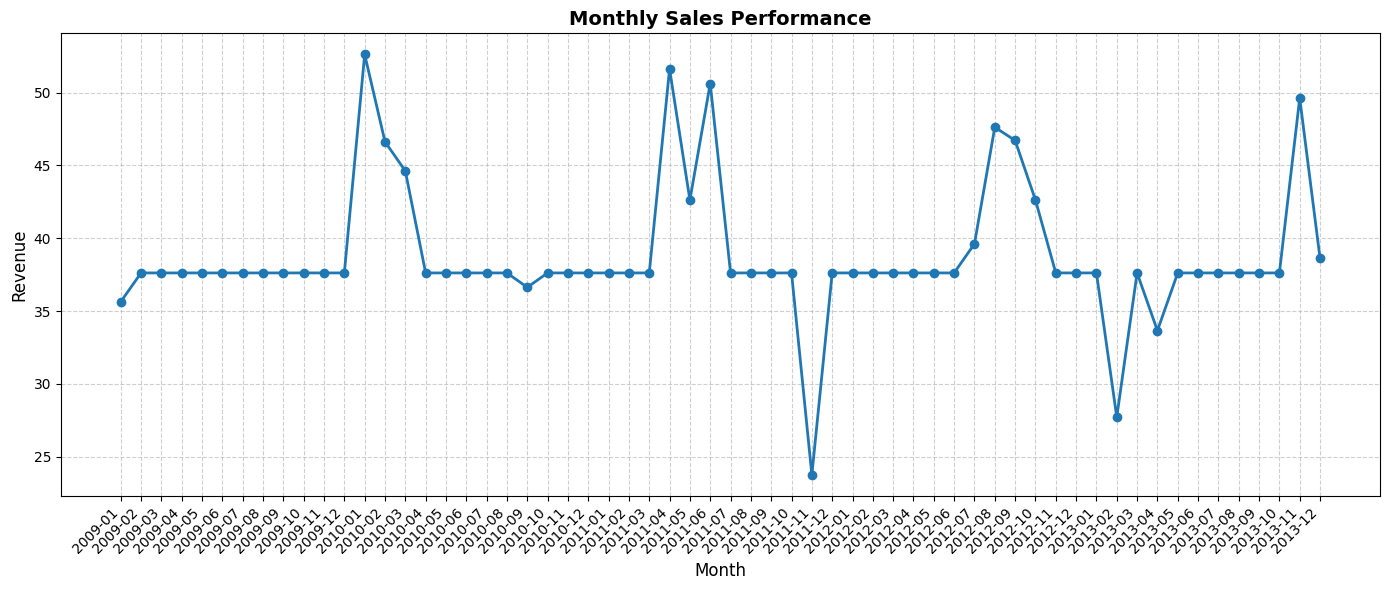

In [16]:
plt.figure(figsize=(14,6))

plt.plot(df3['Month'], df3['monthly_sales'], marker='o', linewidth=2)

plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.title("Monthly Sales Performance", fontsize=14, fontweight="bold")

plt.xticks(rotation=45, ha='right')

plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()
